#### **1. Importing Libraries**

In [1]:
import pandas as pd                                                 # Importing for panel data analysis
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import random
import math
import time
import os
#--------------------~-----------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
#--------------------~-----------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [2]:
# import training data into pandas dataframe
train_csv = pd.read_csv('./data/penguins_train.csv')
print('Shape of the dataset:', train_csv.shape)
train_csv.head(3)

Shape of the dataset: (274, 10)


,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,Biscoe,Yes,38.8,17.2,180.0,3800.0,MALE,9.63954,-25.29856,Adelie Penguin (Pygoscelis adeliae)
1,Torgersen,Yes,41.1,18.6,189.0,3325.0,MALE,9.32277,-26.09989,Adelie Penguin (Pygoscelis adeliae)
2,Biscoe,Yes,39.0,17.5,186.0,3550.0,FEMALE,8.57199,-26.07188,Adelie Penguin (Pygoscelis adeliae)


#### **2. Data Preprocessing**
- Here we try to understand our data and preprocess it to the desirable format.
- All the observations are written in bullet points in markdown.

In [3]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Island               274 non-null    object 
 1   Clutch Completion    274 non-null    object 
 2   Culmen Length (mm)   272 non-null    float64
 3   Culmen Depth (mm)    272 non-null    float64
 4   Flipper Length (mm)  272 non-null    float64
 5   Body Mass (g)        272 non-null    float64
 6   Sex                  267 non-null    object 
 7   Delta 15 N (o/oo)    262 non-null    float64
 8   Delta 13 C (o/oo)    263 non-null    float64
 9   Species              274 non-null    object 
dtypes: float64(6), object(4)
memory usage: 21.5+ KB


- From above we can observe that there are missing values in the attributes: <br />
    'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'.

In [4]:
# Visualize the rows that have missing values
train_csv[train_csv.isnull().any(axis=1)]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
7,Dream,Yes,40.8,18.4,195.0,3900.0,MALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
26,Torgersen,Yes,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,Adelie Penguin (Pygoscelis adeliae)
51,Dream,Yes,51.9,19.5,206.0,3950.0,MALE,NaN,-23.78767,Chinstrap penguin (Pygoscelis antarctica)
62,Torgersen,Yes,36.6,17.8,185.0,3700.0,FEMALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
82,Torgersen,Yes,37.8,17.3,180.0,3700.0,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
97,Biscoe,Yes,47.3,15.3,222.0,5250.0,MALE,NaN,NaN,Gentoo penguin (Pygoscelis papua)
169,Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gentoo penguin (Pygoscelis papua)
170,Torgersen,Yes,38.6,21.2,191.0,3800.0,MALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
197,Torgersen,Yes,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
206,Biscoe,Yes,46.2,14.4,214.0,4650.0,NaN,8.24253,-26.81540,Gentoo penguin (Pygoscelis papua)


- So, in total we have 15 rows out of 274 where missing data exists. This makes 5% of the entire data.

----

- Let's analyze number of unique values in each of the categorical columns

In [5]:
print(train_csv["Island"].value_counts())
print("----------------------------------")
print(train_csv["Clutch Completion"].value_counts())
print("----------------------------------")
print(train_csv["Species"].value_counts())
print("----------------------------------")
print(train_csv["Sex"].value_counts())
print("----------------------------------")

Island
Biscoe       132
Dream        102
Torgersen     40
Name: count, dtype: int64
----------------------------------
Clutch Completion
Yes    245
No      29
Name: count, dtype: int64
----------------------------------
Species
Adelie Penguin (Pygoscelis adeliae)          121
Gentoo penguin (Pygoscelis papua)             95
Chinstrap penguin (Pygoscelis antarctica)     58
Name: count, dtype: int64
----------------------------------
Sex
MALE      135
FEMALE    131
.           1
Name: count, dtype: int64
----------------------------------


In [6]:
# Display the row where there is an anomolous value `.` in 'Sex' column.
results = train_csv.loc[train_csv["Sex"] == '.']
results

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
219,Biscoe,Yes,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444,Gentoo penguin (Pygoscelis papua)


In [7]:
# Insert the Null (NaN) value in place of '.' value
train_csv.at[219,'Sex']=np.nan

In [8]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Island               274 non-null    object 
 1   Clutch Completion    274 non-null    object 
 2   Culmen Length (mm)   272 non-null    float64
 3   Culmen Depth (mm)    272 non-null    float64
 4   Flipper Length (mm)  272 non-null    float64
 5   Body Mass (g)        272 non-null    float64
 6   Sex                  266 non-null    object 
 7   Delta 15 N (o/oo)    262 non-null    float64
 8   Delta 13 C (o/oo)    263 non-null    float64
 9   Species              274 non-null    object 
dtypes: float64(6), object(4)
memory usage: 21.5+ KB


----

- To fill in the missing values, we may consider an imputation technique.
- Let's normalize the data (continuous attributes) before considering any imputation techniques.
- We are choosing z-score normalization to retain the outlier information.

In [9]:
train_csv["Culmen Length (mm)"] = (train_csv["Culmen Length (mm)"] - train_csv["Culmen Length (mm)"].mean())/train_csv["Culmen Length (mm)"].std()
train_csv["Culmen Depth (mm)"] = (train_csv["Culmen Depth (mm)"] - train_csv["Culmen Depth (mm)"].mean())/train_csv["Culmen Depth (mm)"].std()
train_csv["Flipper Length (mm)"] = (train_csv["Flipper Length (mm)"] - train_csv["Flipper Length (mm)"].mean())/train_csv["Flipper Length (mm)"].std()
train_csv["Body Mass (g)"] = (train_csv["Body Mass (g)"] - train_csv["Body Mass (g)"].mean())/train_csv["Body Mass (g)"].std()
train_csv["Delta 15 N (o/oo)"] = (train_csv["Delta 15 N (o/oo)"] - train_csv["Delta 15 N (o/oo)"].mean())/train_csv["Delta 15 N (o/oo)"].std()
train_csv["Delta 13 C (o/oo)"] = (train_csv["Delta 13 C (o/oo)"] - train_csv["Delta 13 C (o/oo)"].mean())/train_csv["Delta 13 C (o/oo)"].std()

In [10]:
train_csv.head(3)

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,Biscoe,Yes,-0.939709,0.008650,-1.479594,-0.477481,MALE,1.581213,0.457687,Adelie Penguin (Pygoscelis adeliae)
1,Torgersen,Yes,-0.524978,0.724744,-0.837160,-1.069378,MALE,1.018050,-0.534716,Adelie Penguin (Pygoscelis adeliae)
2,Biscoe,Yes,-0.903646,0.162099,-1.051305,-0.789006,FEMALE,-0.316707,-0.500027,Adelie Penguin (Pygoscelis adeliae)


----

- Let's analyze the continuous valued attribute `Culmen Length (mm)`

In [11]:
train_csv[train_csv['Culmen Length (mm)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
169,Biscoe,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gentoo penguin (Pygoscelis papua)
248,Torgersen,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)


In [12]:
train_csv["Culmen Length (mm)"].describe()

count    2.720000e+02
mean    -6.791953e-16
std      1.000000e+00
min     -2.147840e+00
25%     -8.134865e-01
50%      7.908804e-02
75%      8.499478e-01
max      2.810907e+00
Name: Culmen Length (mm), dtype: float64

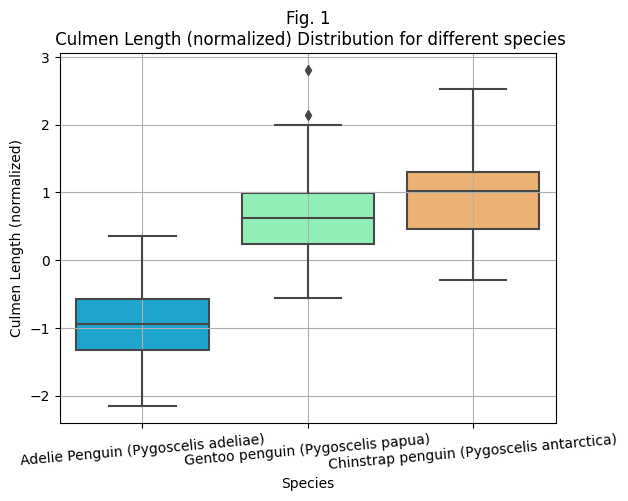

In [13]:
# Creating Box-plot to analyze data distribution
figure = plt.figure()                                                                  # Creating a custom figure size
sns.boxplot(x='Species', y='Culmen Length (mm)', palette='rainbow', data=train_csv)    # Using seaborn's boxplot() function
plt.xlabel(xlabel='Species')                                                           # Labelling x-axis with a custom label
plt.xticks(rotation=5)
plt.ylabel(ylabel='Culmen Length (normalized)')                                                # Labelling y-axis with a custom label
plt.title(label='Fig. 1\n Culmen Length (normalized) Distribution for different species')      # Labelling title with a custom label
plt.grid(visible=True)
plt.show()

- From the box-plot, we oberve that, for the class `Adelie Penguine`, the `Culmen Length` data distribution is almost symmentric. Therefore, to fill the corresponding `NaN` value at index 248, we will use the mean of the values having the same class.
- From the box-plot, we oberve that, for the class `Gentoo Penguine`, the `Culmen Length` data distribution is has got outliers. Therefore, to fill the corresponding `NaN` value at index 169, we will use the median of the values having the same class.

In [14]:
df_species_adelie = train_csv.loc[train_csv["Species"] == 'Adelie Penguin (Pygoscelis adeliae)']
df_species_gentoo = train_csv.loc[train_csv["Species"] == 'Gentoo penguin (Pygoscelis papua)']

In [15]:
train_csv.at[248,'Culmen Length (mm)'] = df_species_adelie["Culmen Length (mm)"].mean()
train_csv.at[169,'Culmen Length (mm)'] = df_species_gentoo["Culmen Length (mm)"].median()

In [16]:
train_csv[train_csv['Culmen Length (mm)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species


- We have filled the missing values of `Culmen Length (mm)` attribute

----

- Let's analyze the continuous valued attribute `Culmen Depth (mm)`

In [17]:
train_csv[train_csv['Culmen Depth (mm)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
169,Biscoe,No,0.620042,NaN,NaN,NaN,NaN,NaN,NaN,Gentoo penguin (Pygoscelis papua)
248,Torgersen,Yes,-0.942564,NaN,NaN,NaN,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)


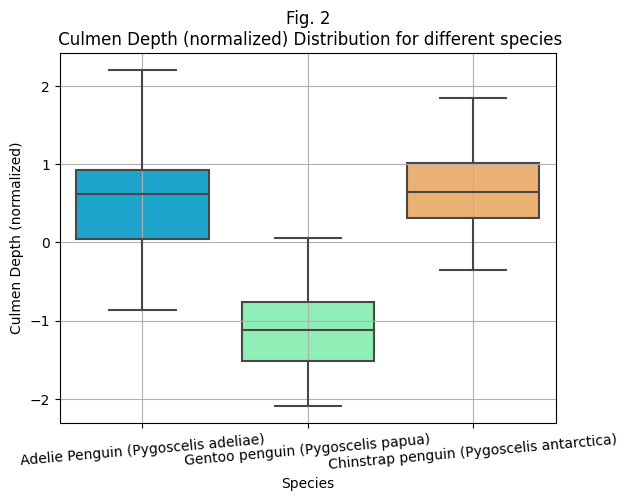

In [18]:
# Creating Box-plot to analyze data distribution
figure = plt.figure()                                                                  # Creating a custom figure size
sns.boxplot(x='Species', y='Culmen Depth (mm)', palette='rainbow', data=train_csv)    # Using seaborn's boxplot() function
plt.xlabel(xlabel='Species')                                                           # Labelling x-axis with a custom label
plt.xticks(rotation=5)
plt.ylabel(ylabel='Culmen Depth (normalized)')                                                # Labelling y-axis with a custom label
plt.title(label='Fig. 2\n Culmen Depth (normalized) Distribution for different species')      # Labelling title with a custom label
plt.grid(visible=True)
plt.show()

- From the box-plot, we oberve that, for the class `Adelie Penguine`, the `Culmen Length` data distribution is **slightly skewed**. Therefore, to fill the corresponding `NaN` value at index 248, we will use the **median** of the values having the same class.  
- Also, for the class `Gentoo penguin`, the `Culmen Length` data distribution is almost symmentric. Therefore, to fill the corresponding `NaN` value at index 169, we will use the **mean** of the values having the same class.  

In [19]:
train_csv.at[248,'Culmen Depth (mm)'] = df_species_adelie["Culmen Depth (mm)"].median()
train_csv.at[169,'Culmen Depth (mm)'] = df_species_gentoo["Culmen Depth (mm)"].mean()


In [20]:
train_csv[train_csv['Culmen Depth (mm)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species


- We have successfully filled the missing values of `Culmen Depth (mm)` attribute

----

- Let's analyze the continuous valued attribute `Flipper Length (mm)`

In [21]:
train_csv[train_csv['Flipper Length (mm)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
169,Biscoe,No,0.620042,-1.121538,NaN,NaN,NaN,NaN,NaN,Gentoo penguin (Pygoscelis papua)
248,Torgersen,Yes,-0.942564,0.622445,NaN,NaN,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)


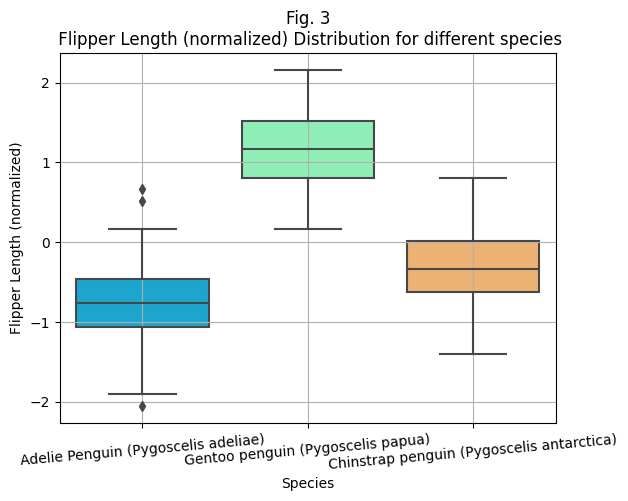

In [22]:
# Creating Box-plot to analyze data distribution
figure = plt.figure()                                                                  # Creating a custom figure size
sns.boxplot(x='Species', y='Flipper Length (mm)', palette='rainbow', data=train_csv)   # Using seaborn's boxplot() function
plt.xlabel(xlabel='Species')                                                           # Labelling x-axis with a custom label
plt.xticks(rotation=5)
plt.ylabel(ylabel='Flipper Length (normalized)')                                                # Labelling y-axis with a custom label
plt.title(label='Fig. 3\n Flipper Length (normalized) Distribution for different species')      # Labelling title with a custom label
plt.grid(visible=True)
plt.show()

- From the box-plot, we oberve a striking difference in the distribution of 'Flipper Length' for the classes 'Adelie Penguine' and 'Gentoo penguin'.
- For the class `Adelie Penguine`, the `Flipper Length` data distribution is almost symmetric even with outliers. Therefore, to fill the corresponding `NaN` value at index 248, we will use the **mean** of the values having the same class.  
- Also, for the class `Gentoo penguin`, the `Flipper Length` data distribution is almost symmentric. Therefore, to fill the corresponding `NaN` value at index 169, we will use the **mean** of the values having the same class.  

In [23]:
train_csv.at[248,'Flipper Length (mm)'] = df_species_adelie["Flipper Length (mm)"].mean()
train_csv.at[169,'Flipper Length (mm)'] = df_species_gentoo["Flipper Length (mm)"].mean()

In [24]:
train_csv[train_csv['Flipper Length (mm)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species


- We have filled the missing values of `Flipper Length (mm)` attribute

----

- Let's analyze the continuous valued attribute `Body Mass (g)`

In [25]:
train_csv[train_csv['Body Mass (g)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
169,Biscoe,No,0.620042,-1.121538,1.185826,NaN,NaN,NaN,NaN,Gentoo penguin (Pygoscelis papua)
248,Torgersen,Yes,-0.942564,0.622445,-0.774701,NaN,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)


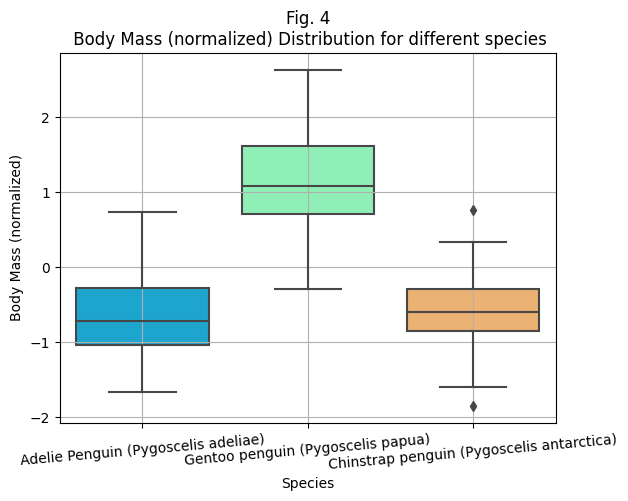

In [26]:
# Creating Box-plot to analyze data distribution
figure = plt.figure()                                                                 # Creating a custom figure size
sns.boxplot(x='Species', y='Body Mass (g)', palette='rainbow', data=train_csv)        # Using seaborn's boxplot() function
plt.xlabel(xlabel='Species')                                                          # Labelling x-axis with a custom label
plt.xticks(rotation=5)
plt.ylabel(ylabel='Body Mass (normalized)')                                           # Labelling y-axis with a custom label
plt.title(label='Fig. 4\n Body Mass (normalized) Distribution for different species') # Labelling title with a custom label
plt.grid(visible=True)
plt.show()

- From the box-plot, we oberve a striking difference in the distribution of 'Body Mass' for the classes 'Adelie Penguine' and 'Gentoo penguin'.
- For the class `Adelie Penguine`, the `Body Mass` data distribution is slightly skewed. Therefore, to fill the corresponding `NaN` value at index 248, we will use the **median** of the values having the same class.  
- Also, for the class `Gentoo penguin`, the `Body Mass` data distribution is slightly skewed. Therefore, to fill the corresponding `NaN` value at index 169, we will use the **median** of the values having the same class.  

In [27]:
train_csv.at[248,'Body Mass (g)'] = df_species_adelie["Body Mass (g)"].median()
train_csv.at[169,'Body Mass (g)'] = df_species_gentoo["Body Mass (g)"].median()

In [28]:
train_csv[train_csv['Body Mass (g)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species


- We have successfully filled the missing values of `Body Mass (g)` attribute

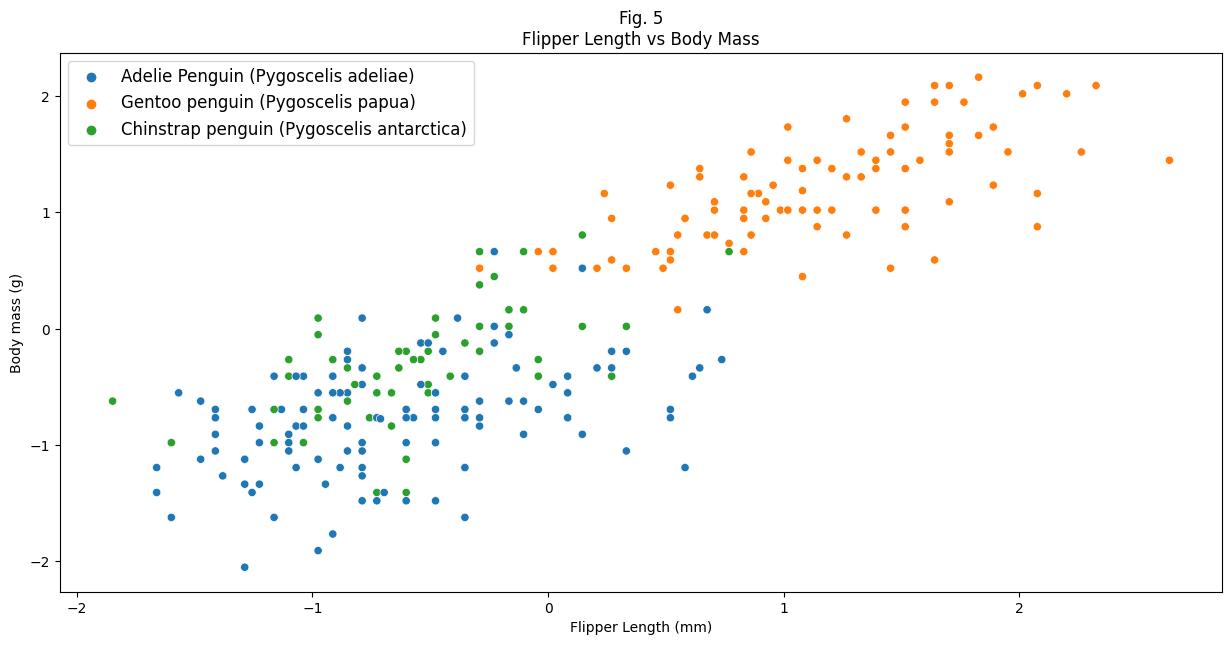

In [29]:
figure = plt.figure(figsize=[15, 7])
sns.scatterplot(x='Body Mass (g)', y='Flipper Length (mm)', hue='Species', data=train_csv)

# plt.xticks(ticks=np.arange(0, 81, 5), size=12)
# plt.xticks(np.arange(0, 90000, 1000), rotation=90)
# Changing y-ticks ranging from 0 to 801 with step size of 50 and label size of 12
# plt.yticks(ticks=np.arange(0, 16, 1))
plt.xlabel(xlabel='Flipper Length (mm)')
plt.ylabel(ylabel='Body mass (g)')
plt.title(label='Fig. 5\nFlipper Length vs Body Mass')
plt.legend(fontsize=12)
plt.show()

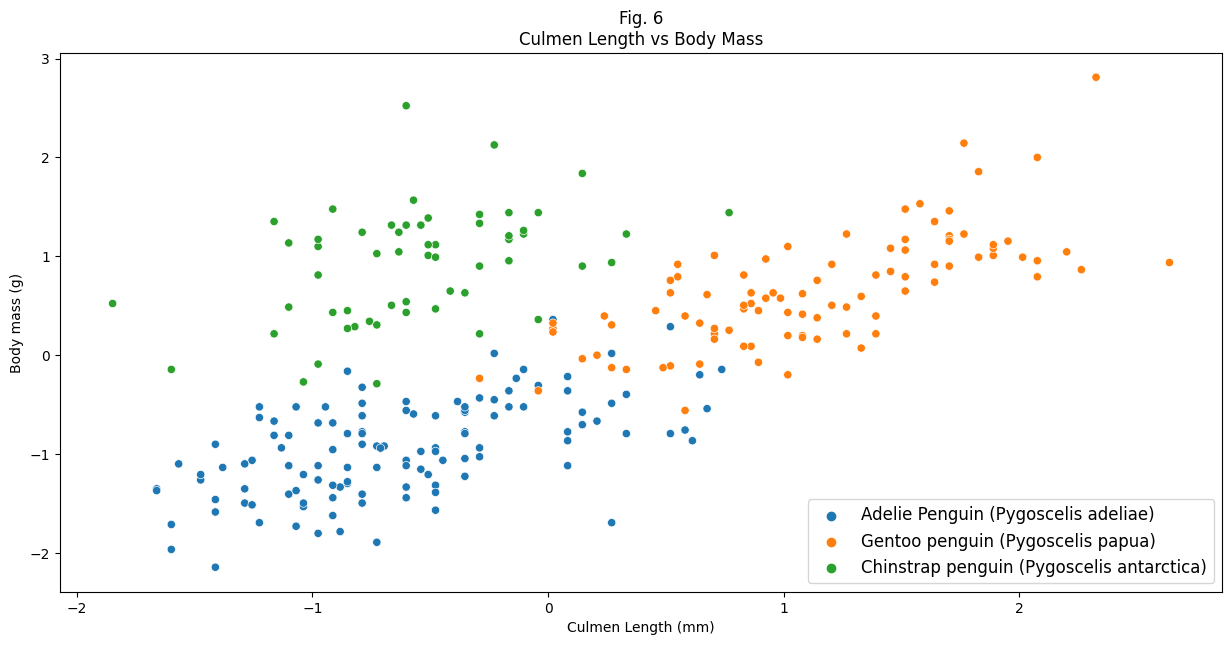

In [30]:
figure = plt.figure(figsize=[15, 7])
sns.scatterplot(x='Body Mass (g)', y='Culmen Length (mm)', hue='Species', data=train_csv)

# plt.xticks(ticks=np.arange(0, 81, 5), size=12)
# plt.xticks(np.arange(0, 90000, 1000), rotation=90)
# Changing y-ticks ranging from 0 to 801 with step size of 50 and label size of 12
# plt.yticks(ticks=np.arange(0, 16, 1))
plt.xlabel(xlabel='Culmen Length (mm)')
plt.ylabel(ylabel='Body mass (g)')
plt.title(label='Fig. 6\nCulmen Length vs Body Mass')
plt.legend(fontsize=12)
plt.show()

----

- Let's analyze the continuous valued attribute `Delta 15 N (o/oo)`

In [31]:
train_csv[train_csv['Delta 15 N (o/oo)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
7,Dream,Yes,-0.579073,0.622445,-0.408870,-0.352871,MALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
51,Dream,Yes,1.422458,1.185091,0.376328,-0.290566,MALE,NaN,2.32884,Chinstrap penguin (Pygoscelis antarctica)
62,Torgersen,Yes,-1.336409,0.315548,-1.122686,-0.602091,FEMALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
82,Torgersen,Yes,-1.120027,0.059800,-1.479594,-0.602091,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
97,Biscoe,Yes,0.592995,-0.963192,1.518434,1.329364,MALE,NaN,NaN,Gentoo penguin (Pygoscelis papua)
169,Biscoe,No,0.620042,-1.121538,1.185826,1.080144,NaN,NaN,NaN,Gentoo penguin (Pygoscelis papua)
170,Torgersen,Yes,-0.975773,2.054633,-0.694396,-0.477481,MALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
197,Torgersen,Yes,-1.787204,0.468996,-0.551633,-0.882463,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
207,Dream,No,-0.759391,0.980492,-1.194068,0.581704,MALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
218,Torgersen,Yes,-0.524978,0.213249,-1.336831,-1.225141,FEMALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)


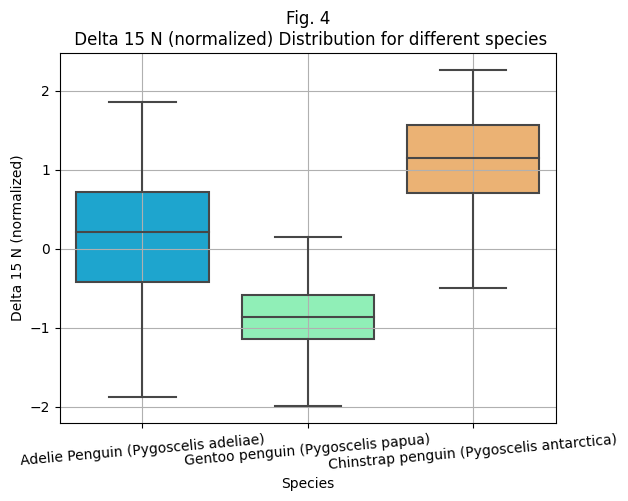

In [32]:
# Creating Box-plot to analyze data distribution
figure = plt.figure()                                                                 # Creating a custom figure size
sns.boxplot(x='Species', y='Delta 15 N (o/oo)', palette='rainbow', data=train_csv)        # Using seaborn's boxplot() function
plt.xlabel(xlabel='Species')                                                          # Labelling x-axis with a custom label
plt.xticks(rotation=5)
plt.ylabel(ylabel='Delta 15 N (normalized)')                                           # Labelling y-axis with a custom label
plt.title(label='Fig. 4\n Delta 15 N (normalized) Distribution for different species') # Labelling title with a custom label
plt.grid(visible=True)
plt.show()

- For the class `Adelie Penguine`, the `Delta 15 N (o/oo)` data distribution is slightly skewed. Therefore, to fill the corresponding `NaN`, we will use the **median** of the values having the same class.  
- Also, for the class `Gentoo penguin`, the `Delta 15 N (o/oo)` data distribution is almost symmentrical. Therefore, to fill the corresponding `NaN`, we will use the **mean** of the values having the same class.  
- And, for the class `Chinstrap penguin`, the `Delta 15 N (o/oo)` data distribution is almost symmentrical. Therefore, to fill the corresponding `NaN` value, we will use the **mean** of the values having the same class.  

In [33]:
df_species_chinstrap = train_csv.loc[train_csv["Species"] == 'Chinstrap penguin (Pygoscelis antarctica)']

value_adelie = df_species_adelie["Delta 15 N (o/oo)"].median()
value_gentoo = df_species_gentoo["Delta 15 N (o/oo)"].mean()
value_chinstrap = df_species_chinstrap["Delta 15 N (o/oo)"].mean()

In [34]:
# results = train_csv.loc[(train_csv["Delta 15 N (o/oo)"].isnull()) & (train_csv["Species"] == 'Gentoo penguin (Pygoscelis papua)')]
# results

In [35]:
train_csv.loc[(train_csv["Delta 15 N (o/oo)"].isnull()) & (train_csv["Species"] == 'Adelie Penguin (Pygoscelis adeliae)'), ['Delta 15 N (o/oo)']] = value_adelie
train_csv.loc[(train_csv["Delta 15 N (o/oo)"].isnull()) & (train_csv["Species"] == 'Gentoo penguin (Pygoscelis papua)'), ['Delta 15 N (o/oo)']] = value_gentoo
train_csv.loc[(train_csv["Delta 15 N (o/oo)"].isnull()) & (train_csv["Species"] == 'Chinstrap penguin (Pygoscelis antarctica)'), ['Delta 15 N (o/oo)']] = value_chinstrap

In [36]:
train_csv[train_csv['Delta 15 N (o/oo)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species


- We have successfully filled the missing values of `Delta 15 N (o/oo)` attribute

----

- Let's analyze the continuous valued attribute `Delta 13 C (o/oo)`

In [37]:
train_csv[train_csv['Delta 13 C (o/oo)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
7,Dream,Yes,-0.579073,0.622445,-0.408870,-0.352871,MALE,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)
62,Torgersen,Yes,-1.336409,0.315548,-1.122686,-0.602091,FEMALE,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)
82,Torgersen,Yes,-1.120027,0.059800,-1.479594,-0.602091,NaN,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)
97,Biscoe,Yes,0.592995,-0.963192,1.518434,1.329364,MALE,-0.882649,NaN,Gentoo penguin (Pygoscelis papua)
169,Biscoe,No,0.620042,-1.121538,1.185826,1.080144,NaN,-0.882649,NaN,Gentoo penguin (Pygoscelis papua)
170,Torgersen,Yes,-0.975773,2.054633,-0.694396,-0.477481,MALE,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)
197,Torgersen,Yes,-1.787204,0.468996,-0.551633,-0.882463,NaN,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)
207,Dream,No,-0.759391,0.980492,-1.194068,0.581704,MALE,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)
218,Torgersen,Yes,-0.524978,0.213249,-1.336831,-1.225141,FEMALE,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)
229,Dream,Yes,-0.524978,0.929343,-1.336831,-0.944768,MALE,0.207308,NaN,Adelie Penguin (Pygoscelis adeliae)


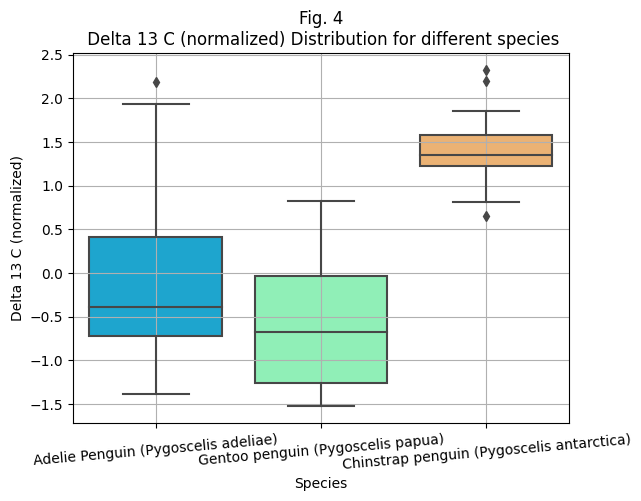

In [38]:
# Creating Box-plot to analyze data distribution
figure = plt.figure()                                                                 # Creating a custom figure size
sns.boxplot(x='Species', y='Delta 13 C (o/oo)', palette='rainbow', data=train_csv)        # Using seaborn's boxplot() function
plt.xlabel(xlabel='Species')                                                          # Labelling x-axis with a custom label
plt.xticks(rotation=5)
plt.ylabel(ylabel='Delta 13 C (normalized)')                                           # Labelling y-axis with a custom label
plt.title(label='Fig. 4\n Delta 13 C (normalized) Distribution for different species') # Labelling title with a custom label
plt.grid(visible=True)
plt.show()

- For the class `Adelie Penguine`, the `Delta 13 C (o/oo)` data distribution is skewed. Therefore, to fill the corresponding `NaN`, we will use the **median** of the values having the same class.  
- Also, for the class `Gentoo penguin`, the `Delta 13 C (o/oo)` data distribution is almost symmentrical. Therefore, to fill the corresponding `NaN`, we will use the **mean** of the values having the same class.

In [39]:
value_adelie = df_species_adelie["Delta 13 C (o/oo)"].median()
value_gentoo = df_species_gentoo["Delta 13 C (o/oo)"].mean()

In [40]:
train_csv.loc[(train_csv["Delta 13 C (o/oo)"].isnull()) & (train_csv["Species"] == 'Adelie Penguin (Pygoscelis adeliae)'), ['Delta 13 C (o/oo)']] = value_adelie
train_csv.loc[(train_csv["Delta 13 C (o/oo)"].isnull()) & (train_csv["Species"] == 'Gentoo penguin (Pygoscelis papua)'), ['Delta 13 C (o/oo)']] = value_gentoo

In [41]:
train_csv[train_csv['Delta 13 C (o/oo)'].isnull()]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species


- We have filled the missing values of `Delta 13 C (o/oo)` attribute

----

In [42]:
# Visualize the rows that have missing values
train_csv[train_csv.isnull().any(axis=1)]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
26,Torgersen,Yes,-0.362691,1.543138,-0.765778,0.083264,NaN,0.681774,0.711419,Adelie Penguin (Pygoscelis adeliae)
82,Torgersen,Yes,-1.120027,0.059800,-1.479594,-0.602091,NaN,0.207308,-0.389576,Adelie Penguin (Pygoscelis adeliae)
169,Biscoe,No,0.620042,-1.121538,1.185826,1.080144,NaN,-0.882649,-0.648235,Gentoo penguin (Pygoscelis papua)
197,Torgersen,Yes,-1.787204,0.468996,-0.551633,-0.882463,NaN,0.207308,-0.389576,Adelie Penguin (Pygoscelis adeliae)
206,Biscoe,Yes,0.394645,-1.423538,0.947381,0.581704,NaN,-0.902430,-1.420835,Gentoo penguin (Pygoscelis papua)
212,Torgersen,Yes,-1.120027,-0.042499,-1.051305,-1.100531,NaN,-0.209255,0.563462,Adelie Penguin (Pygoscelis adeliae)
219,Biscoe,Yes,0.088104,-0.758593,1.161526,0.862077,NaN,-1.260520,-0.639426,Gentoo penguin (Pygoscelis papua)
248,Torgersen,Yes,-0.942564,0.622445,-0.774701,-0.711124,NaN,0.207308,-0.389576,Adelie Penguin (Pygoscelis adeliae)


- As we can observe, only `Sex` attribute has NaN values. Let's train a Decision trees classifier to classify the Sex, given other attributes.
- Let's prepare the data first.
    - Get the data where 'Sex' != 'Nan', and encode all the categorical values (`DT_data`).
    - Encode the data into train and test set (88%->train - 12%->test).
    - Train a DT classifier using Scikit-Learn library.
    - Once the accuracy on the validation set is desirable, use the trained decision-tree classifier to predict the value of NaN values of Sex attribute.
    - update the trained model output back to `train_csv` dataframe

In [43]:
train_csv.head(1)

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,Biscoe,Yes,-0.939709,0.00865,-1.479594,-0.477481,MALE,1.581213,0.457687,Adelie Penguin (Pygoscelis adeliae)


In [44]:
DT_data = train_csv.copy()
DT_data = DT_data.dropna() # dropping the rows having NaN values
DT_X = DT_data[['Island', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Species']] # separate features and target variable
DT_y = DT_data['Sex']
DT_X_encoded = pd.get_dummies(DT_X, columns=['Island', 'Species'])
DT_X_encoded.replace({'Yes': 1, 'No': 0}, inplace=True) # for encoding 'Clutch Completion'
DT_X_encoded.replace({True: 1, False: 0}, inplace=True)
DT_y_encoded = DT_y
DT_y_encoded.replace({'MALE': 0, 'FEMALE': 1}, inplace=True)

In [45]:
DT_X_encoded.head(1)

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua)
0,1,-0.939709,0.00865,-1.479594,-0.477481,1.581213,0.457687,1,0,0,1,0,0


In [46]:
DT_y_encoded.head(1)

0    0
Name: Sex, dtype: int64

In [47]:


# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Initialize StratifiedKFold
stratkf = StratifiedKFold(n_splits=20, random_state=42, shuffle=True)

# Initialize a list to store the cross-validation scores
cv_scores = []

# Perform stratified K-fold cross-validation
for train_idx, val_idx in stratkf.split(DT_X_encoded, DT_y_encoded):
    # print("train_idx", train_idx)
    # print("val_idx", val_idx)
    X_train, X_val = DT_X_encoded.iloc[train_idx], DT_X_encoded.iloc[val_idx]
    y_train, y_val = DT_y_encoded.iloc[train_idx], DT_y_encoded.iloc[val_idx]
    # print(f"X_train: {X_train}")
    # print(f"y_train: {y_train}\ny_val: {y_val}")
    # print(f"X_val: {X_val}")
#     print("-----------")

    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate on validation set
    score = model.score(X_val, y_val)
    cv_scores.append(score)

from statistics import mean, stdev

print("cv_scores:", cv_scores)
# Step 3: Evaluate accuracy of the trained model

print('List of possible accuracy:', cv_scores)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(cv_scores)*100, '%')
print('\nMinimum Accuracy:',
      min(cv_scores)*100, '%')
print('\nOverall Accuracy:',
      mean(cv_scores)*100, '%')
print('\nStandard Deviation is:', stdev(cv_scores))

cv_scores: [0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 1.0, 0.9285714285714286, 0.9285714285714286, 0.8461538461538461, 0.8461538461538461, 0.9230769230769231, 0.8461538461538461, 0.9230769230769231, 0.9230769230769231, 0.7692307692307693, 0.8461538461538461, 0.9230769230769231, 0.7692307692307693, 0.7692307692307693, 0.6923076923076923, 0.7692307692307693, 0.9230769230769231]
List of possible accuracy: [0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 1.0, 0.9285714285714286, 0.9285714285714286, 0.8461538461538461, 0.8461538461538461, 0.9230769230769231, 0.8461538461538461, 0.9230769230769231, 0.9230769230769231, 0.7692307692307693, 0.8461538461538461, 0.9230769230769231, 0.7692307692307693, 0.7692307692307693, 0.6923076923076923, 0.7692307692307693, 0.9230769230769231]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 69.23076923076923 %

Overall Accuracy: 86.34615384615385 %

Standard Deviation is: 0.07787306882481278


In [48]:
X_train, X_test, y_train, y_test = train_test_split(DT_X_encoded, DT_y_encoded, stratify=DT_y_encoded, test_size=0.2, random_state=42)
# Create Decision Tree classifer object
# clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
# clf = clf.fit(X_train,y_train)
model.fit(X_train,y_train)

# Predict the response for test dataset
# y_pred = clf.predict(X_test)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23  4]
 [ 7 20]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.83      0.74      0.78        27

    accuracy                           0.80        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.80      0.80      0.80        54



In [49]:
# training without splitting data
model.fit(DT_X_encoded,DT_y_encoded)

DecisionTreeClassifier(random_state=42)

- With the help of trained model, now let's fill in missing values of 'Sex' attribute.

In [50]:
train_csv[train_csv.isnull().any(axis=1)].head(1)

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
26,Torgersen,Yes,-0.362691,1.543138,-0.765778,0.083264,NaN,0.681774,0.711419,Adelie Penguin (Pygoscelis adeliae)


In [51]:
X_null = train_csv[train_csv.isnull().any(axis=1)]
# Data Preprocessing to make the data of the same format that we used to tran DT i.e., `DT_X_encoded` and `DT_y_encoded`
{'Island_Dream':[0,0,0,0,0,0,0,0]}
{'Species_Chinstrap penguin (Pygoscelis antarctica)': [0,0,0,0,0,0,0,0]}
X_null = X_null[['Island', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Species']] # separate features and target variable
X_encoded_null = pd.get_dummies(X_null, columns=['Island', 'Species'])
X_encoded_null.replace({'Yes': 1, 'No': 0}, inplace=True) # for encoding 'Clutch Completion'
X_encoded_null.replace({False: 0, True: 1}, inplace=True)
X_encoded_null.insert(8, "Island_Dream", [0,0,0,0,0,0,0,0], True)
X_encoded_null.insert(11, "Species_Chinstrap penguin (Pygoscelis antarctica)", [0,0,0,0,0,0,0,0], True)

In [52]:
X_encoded_null.head(1) # match if this format matches `DT_X_encoded`

,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua)
26,1,-0.362691,1.543138,-0.765778,0.083264,0.681774,0.711419,0,0,1,1,0,0


In [53]:
# predict
y_pred = model.predict(X_encoded_null)

In [54]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1])

In [55]:
# Let's fill the missing values with the predicted values
for pred_idx, ind in enumerate(train_csv[train_csv.isnull().any(axis=1)].index):
    if y_pred[pred_idx] == 0:
        train_csv.at[ind,'Sex']='MALE'
    if y_pred[pred_idx] == 1:
        train_csv.at[ind,'Sex']='FEMALE'
# train_csv.at[82,'Sex']

In [56]:
train_csv.iloc[82]

Island                                           Torgersen
Clutch Completion                                      Yes
Culmen Length (mm)                               -1.120027
Culmen Depth (mm)                                   0.0598
Flipper Length (mm)                              -1.479594
Body Mass (g)                                    -0.602091
Sex                                                 FEMALE
Delta 15 N (o/oo)                                 0.207308
Delta 13 C (o/oo)                                -0.389576
Species                Adelie Penguin (Pygoscelis adeliae)
Name: 82, dtype: object

In [57]:
train_csv.head(1)

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,Biscoe,Yes,-0.939709,0.00865,-1.479594,-0.477481,MALE,1.581213,0.457687,Adelie Penguin (Pygoscelis adeliae)


In [58]:
train_csv[train_csv.isnull().any(axis=1)]

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species


- All the NaN values have been imputed successfully.

In [59]:
del DT_X_encoded, DT_data, DT_y, DT_y_encoded, X_encoded_null, X_null, X_test, X_train, X_val, cv_scores, df_species_adelie
del df_species_chinstrap, df_species_gentoo, ind, pred_idx, results, score, train_idx, val_idx, value_adelie, value_chinstrap, value_gentoo
del y_pred, y_test, y_train, y_val 

----

## Random Forests 
The cells below show the implementation of the random forests algorithm.
It is implemented in the following manner:
- K Bootstrap training sets are created.
- A total of K classifiers are trained on the bootstrap training sets.
- Majority voting is implemented to obtain the final prediction.


In [60]:
def train_test_split(df, train_frac):
    #Shuffle the dataframe
    df = df.sample(frac=1)
    df.index = range(0, df.shape[0])
    train_df = df.loc[0:int(train_frac * len(df)) - 1,:]
    test_df = df.loc[int(train_frac * len(df)):, :]
    return train_df, test_df 

def encode_features(df, features):
    label_encoder = LabelEncoder()
    ohe = OneHotEncoder(sparse=True)
    #Label Encoder followed by One Hot Encoding
    for feature in features:
        integer_encoded = label_encoder.fit_transform(df[feature]).reshape(-1,1)
        # print(label_encoder.classes_)
        array_hot_encoded = ohe.fit_transform(integer_encoded).toarray()
        # print(ohe.categories_)
        for i_iter, categories in enumerate(label_encoder.classes_):
            df[f"ohe_" + feature + "_" + categories] = array_hot_encoded[:, i_iter]
    # df_check = df.loc[:, ['Island', 'ohe_Island_Biscoe', 'ohe_Island_Dream', 'ohe_Island_Torgersen']]
    # print(df_check)
    # df_check_1 = df.loc[:, ['Sex', 'ohe_Sex_MALE', 'ohe_Sex_FEMALE']]
    # print(df_check_1)
    # print(f"Waiting for input...")
    return df 

def encode_label(df, labelname):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(df[labelname]).reshape(-1,1)
    df['encoded_' + labelname] = integer_encoded
    return df 



train_frac = 0.7
df_subset = train_csv.loc[:,:]
#Renaming for easier use 
df_subset = df_subset.rename(columns={"Clutch Completion": "Clutch_Completion"})
df_subset = encode_features(df_subset, ["Island", "Sex", "Clutch_Completion"])
df_subset = encode_label(df_subset, "Species")
#Train Test Split
df_train, df_test = train_test_split(df_subset, train_frac)

In [61]:
def create_bootstrap_train(df):
    t_k = df.sample(n = df.shape[0], replace=True)
    return t_k

def create_dt(X_train, Y_train):
    clf = DecisionTreeClassifier(criterion="gini", max_features="log2")
    clf.fit(X_train, Y_train)
    return clf 

#Creating the decision tree
n = 5
feature_ls = ['ohe_Island_Biscoe', 'ohe_Island_Dream', 'ohe_Island_Torgersen', 'ohe_Sex_FEMALE', 'ohe_Sex_MALE',\
               'ohe_Clutch_Completion_No', 'ohe_Clutch_Completion_Yes', 'Culmen Length (mm)', 'Culmen Depth (mm)',\
                'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
label_ls = ['encoded_Species']
clf_ls = []
for i_iter in range(0, n):
    df_bootstrap_train = create_bootstrap_train(df_train)
    X_train, Y_train = df_bootstrap_train.loc[:, feature_ls].to_numpy(), df_bootstrap_train.loc[:, label_ls].to_numpy()
    clf = create_dt(X_train, Y_train)
    clf_ls.append(clf)


#Prediction
X_test, Y_test = df_test.loc[:, feature_ls].to_numpy(), df_test.loc[:, label_ls].to_numpy()
for i_iter, classifier in enumerate(clf_ls):
    Y_pred = classifier.predict(X_test).reshape(1,-1)
    if i_iter == 0:
        Y_pred_arr = Y_pred
    else:
        Y_pred_arr = np.concatenate((Y_pred_arr, Y_pred), axis=0)

Y_pred_best_ls = []
for j_iter in range(0, Y_pred_arr.shape[1]):
    counts = np.bincount(Y_pred_arr[:,j_iter]) #count the number of elements of each value
    Y_pred_best_ls.append(np.argwhere(counts == np.max(counts))[-1][0])

target_names = ['Adelie Penguin', 'Chinstrap penguin', 'Gentoo penguin']
print(f"Classification Report:")
print(classification_report(Y_test, Y_pred_best_ls, target_names=target_names))
print(f"Confusion_matrix")
print(confusion_matrix(Y_test, Y_pred_best_ls))


Classification Report:
                   precision    recall  f1-score   support

   Adelie Penguin       1.00      0.94      0.97        35
Chinstrap penguin       0.89      1.00      0.94        16
   Gentoo penguin       1.00      1.00      1.00        32

         accuracy                           0.98        83
        macro avg       0.96      0.98      0.97        83
     weighted avg       0.98      0.98      0.98        83

Confusion_matrix
[[33  2  0]
 [ 0 16  0]
 [ 0  0 32]]
